<a href="https://colab.research.google.com/github/damnknife/Project1/blob/master/Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import pandas_profiling
%pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display
%pip install ppscore
import ppscore as pps
from statsmodels.stats.weightstats import ztest


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 15)


# Preprocessing

In [74]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter = ';')



#Exploratory data analysis

Checagem rapida da integridade dos dados


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [80]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

O minimo para a coluna de interesse quality é 3 e o máximo 8

Análise rápida usando o autoviz para checagem de padrões nos dados

Shape of your Data Set: (1599, 12)
Classifying variables in data set...
    11 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Total Number of Scatter Plots = 66
No categorical or boolean vars in data set. Hence no pivot plots...
Nothing to add Plot not being added
No categorical or boolean vars in data set. Hence no bar charts.
Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 11.523


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

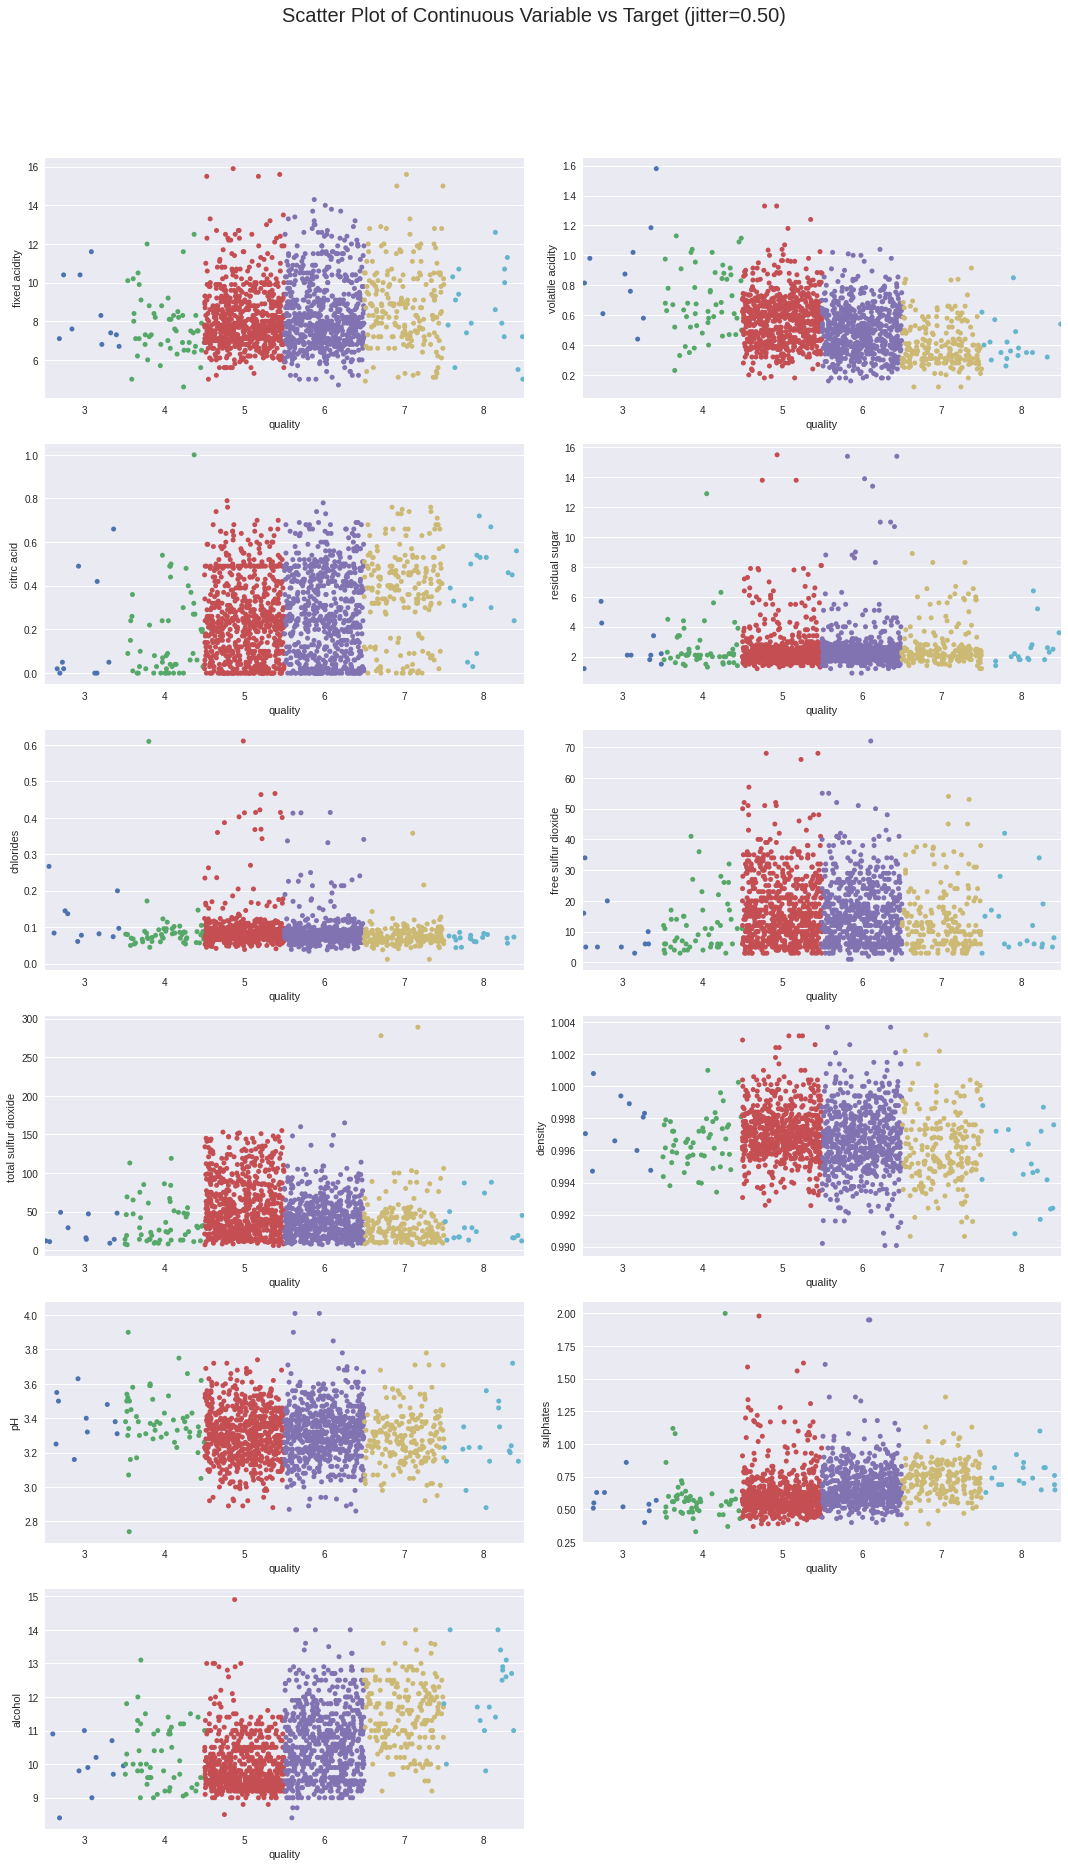

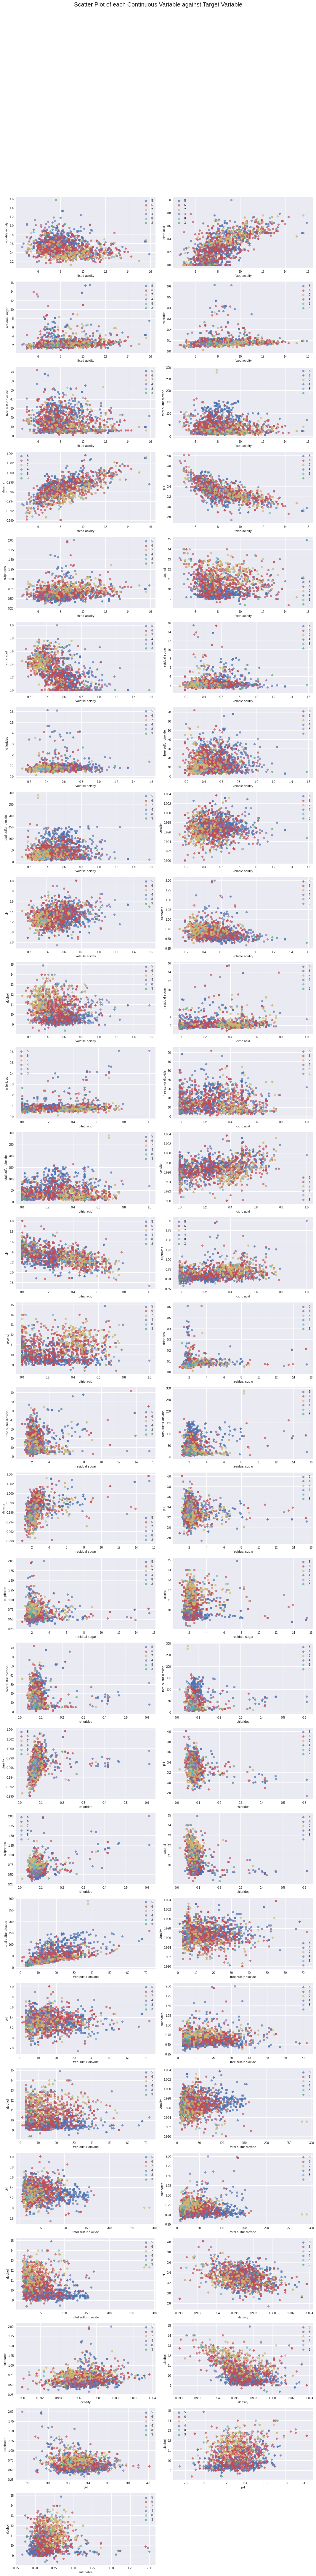

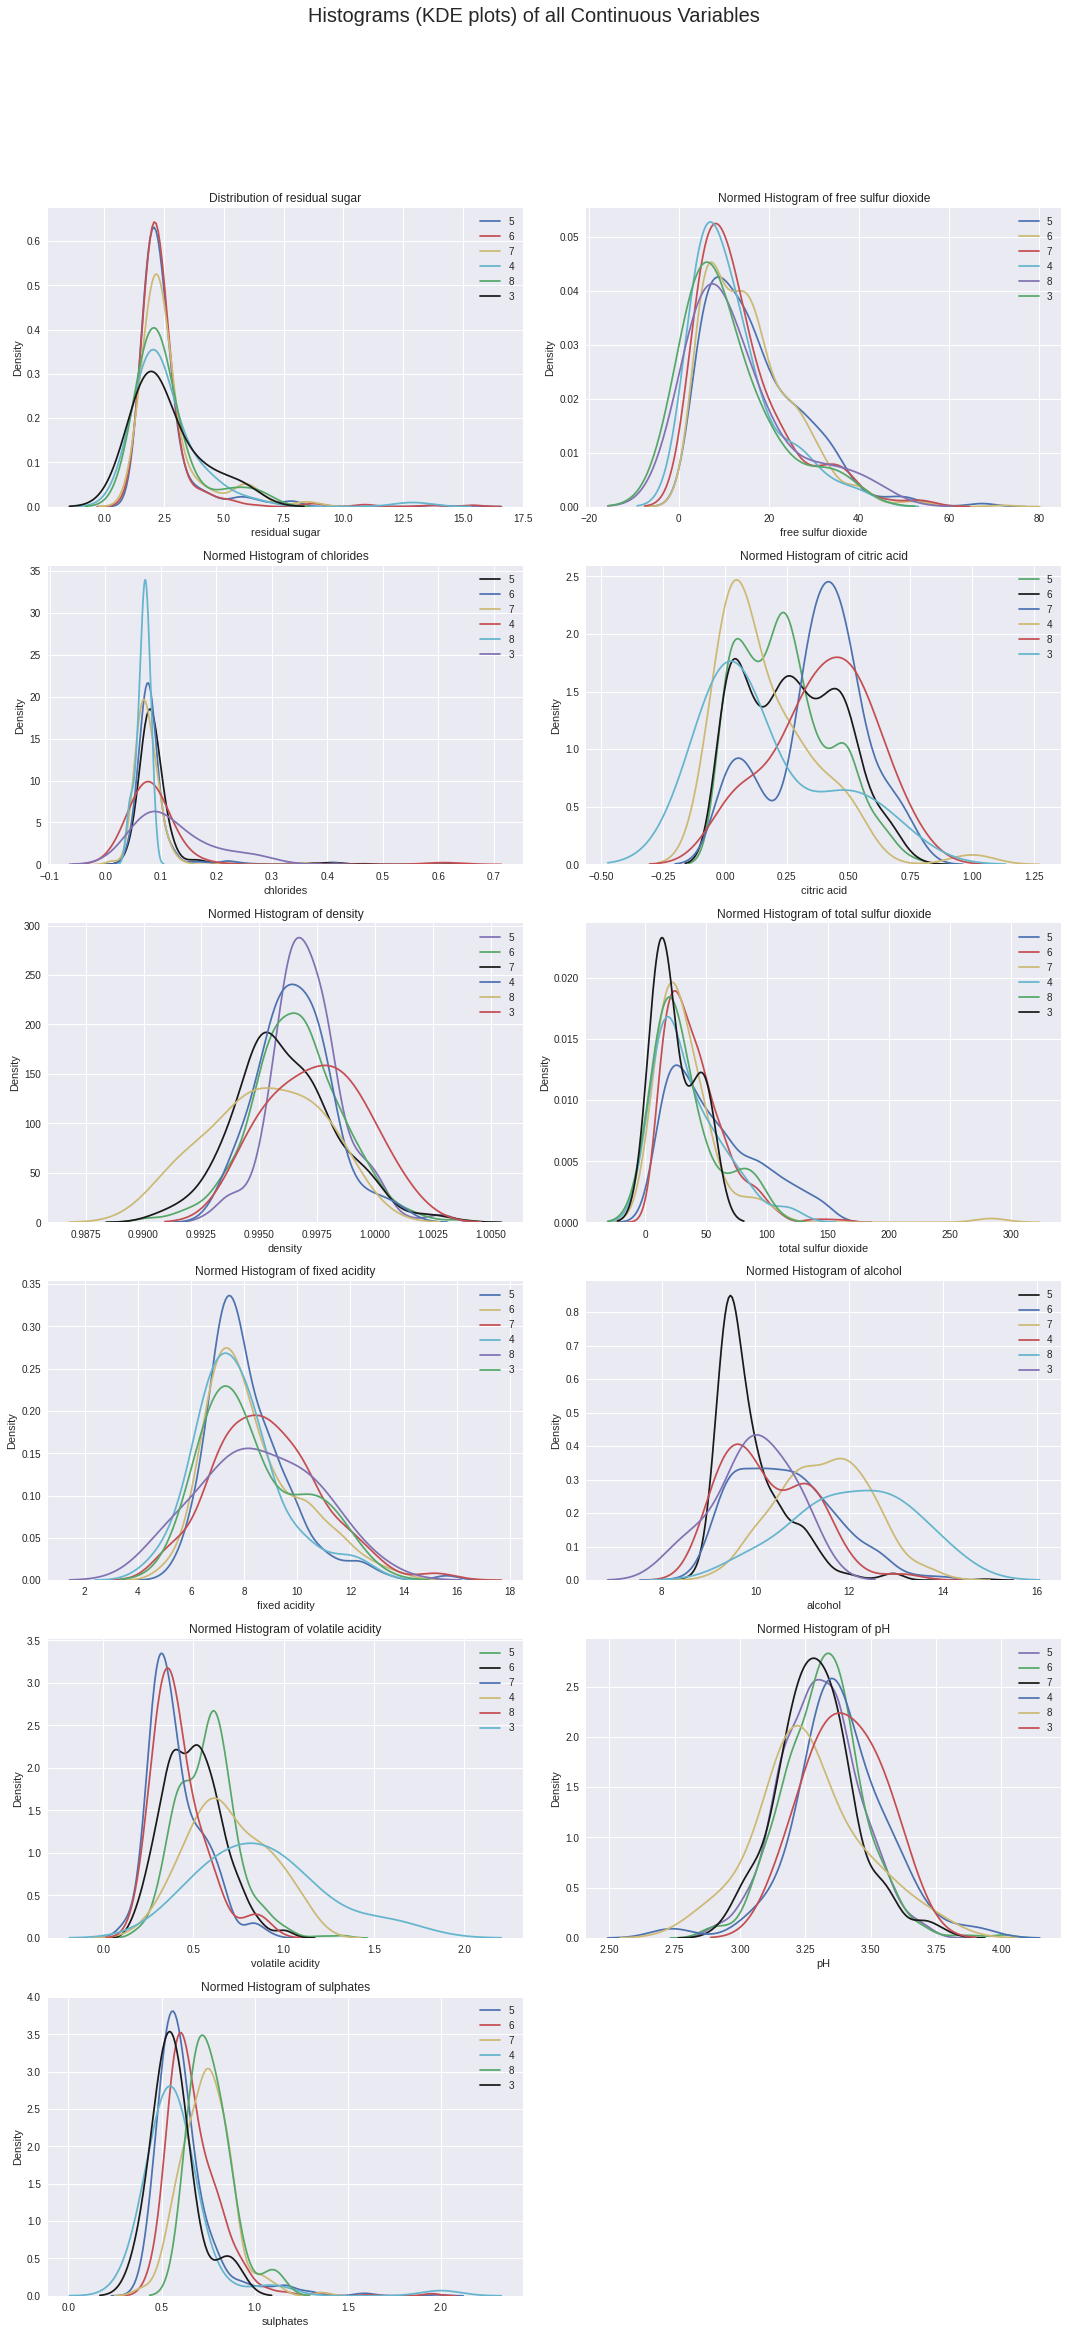

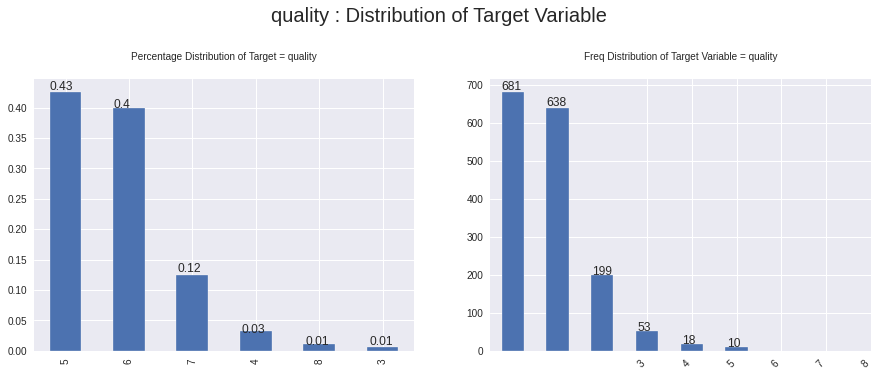

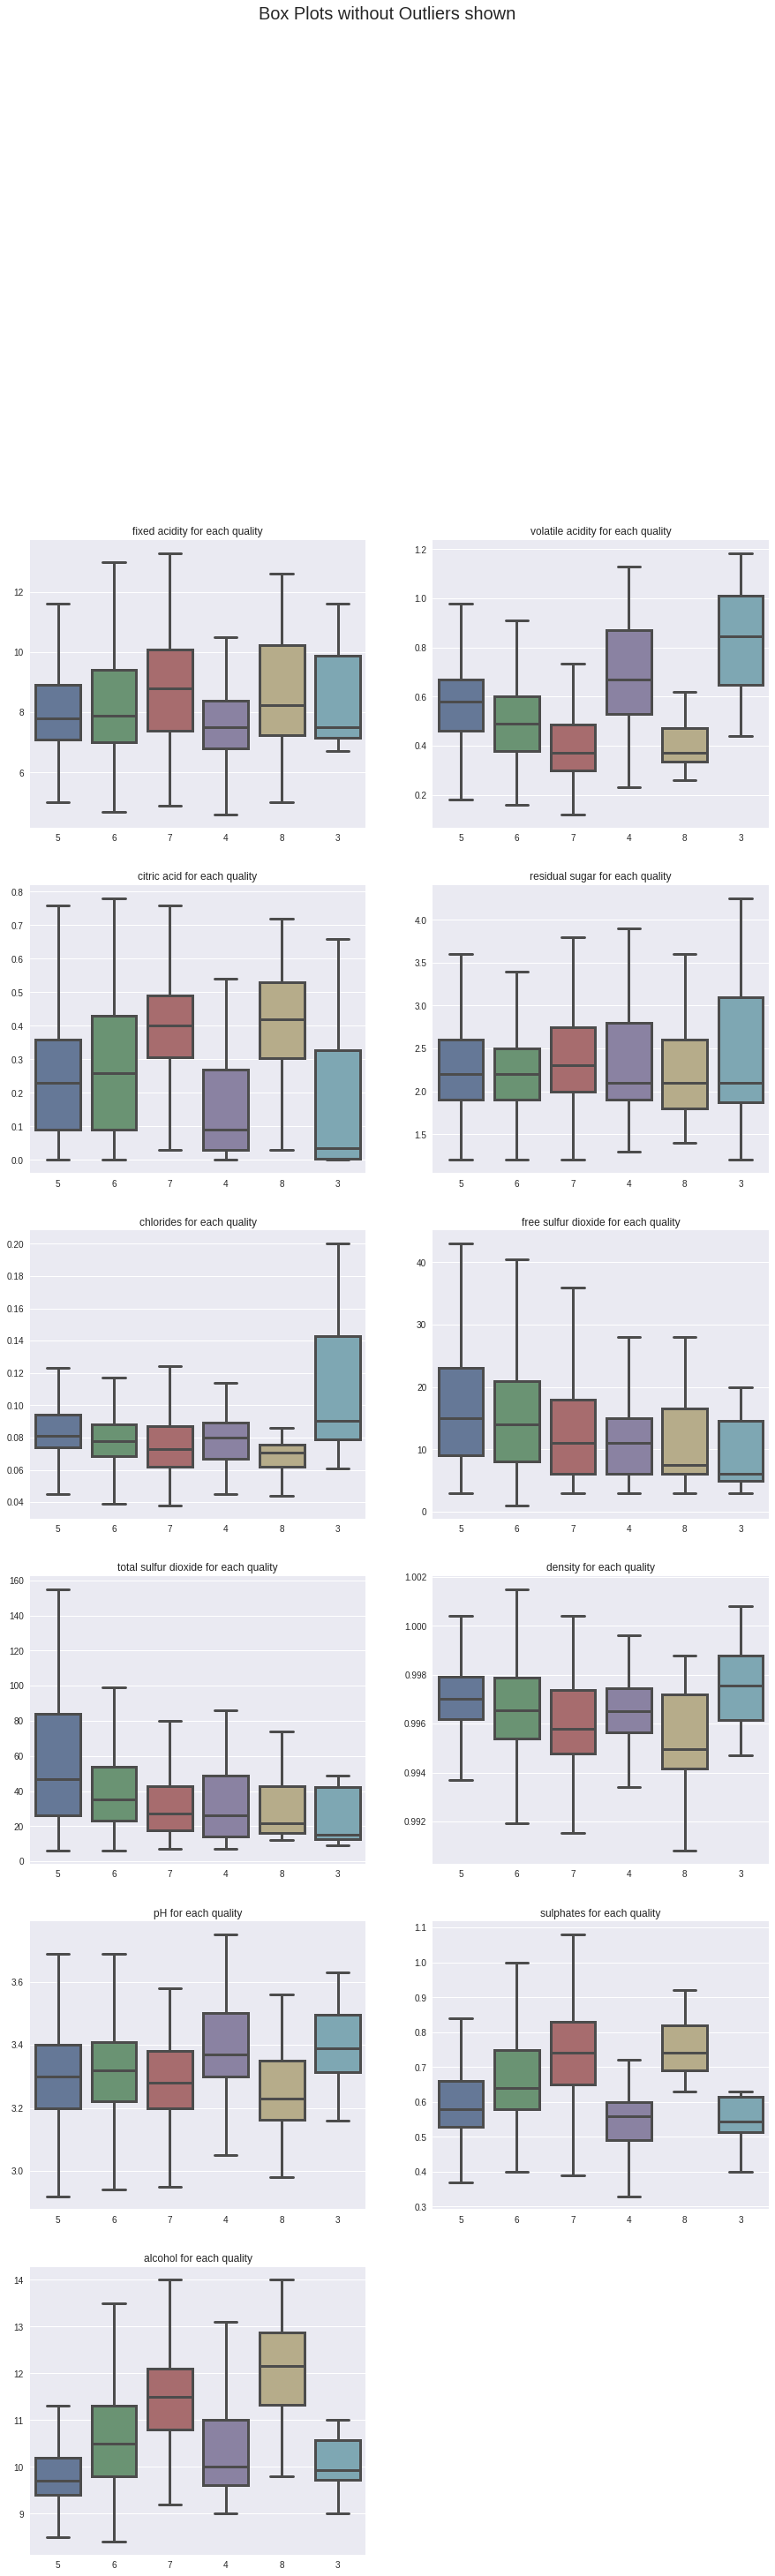

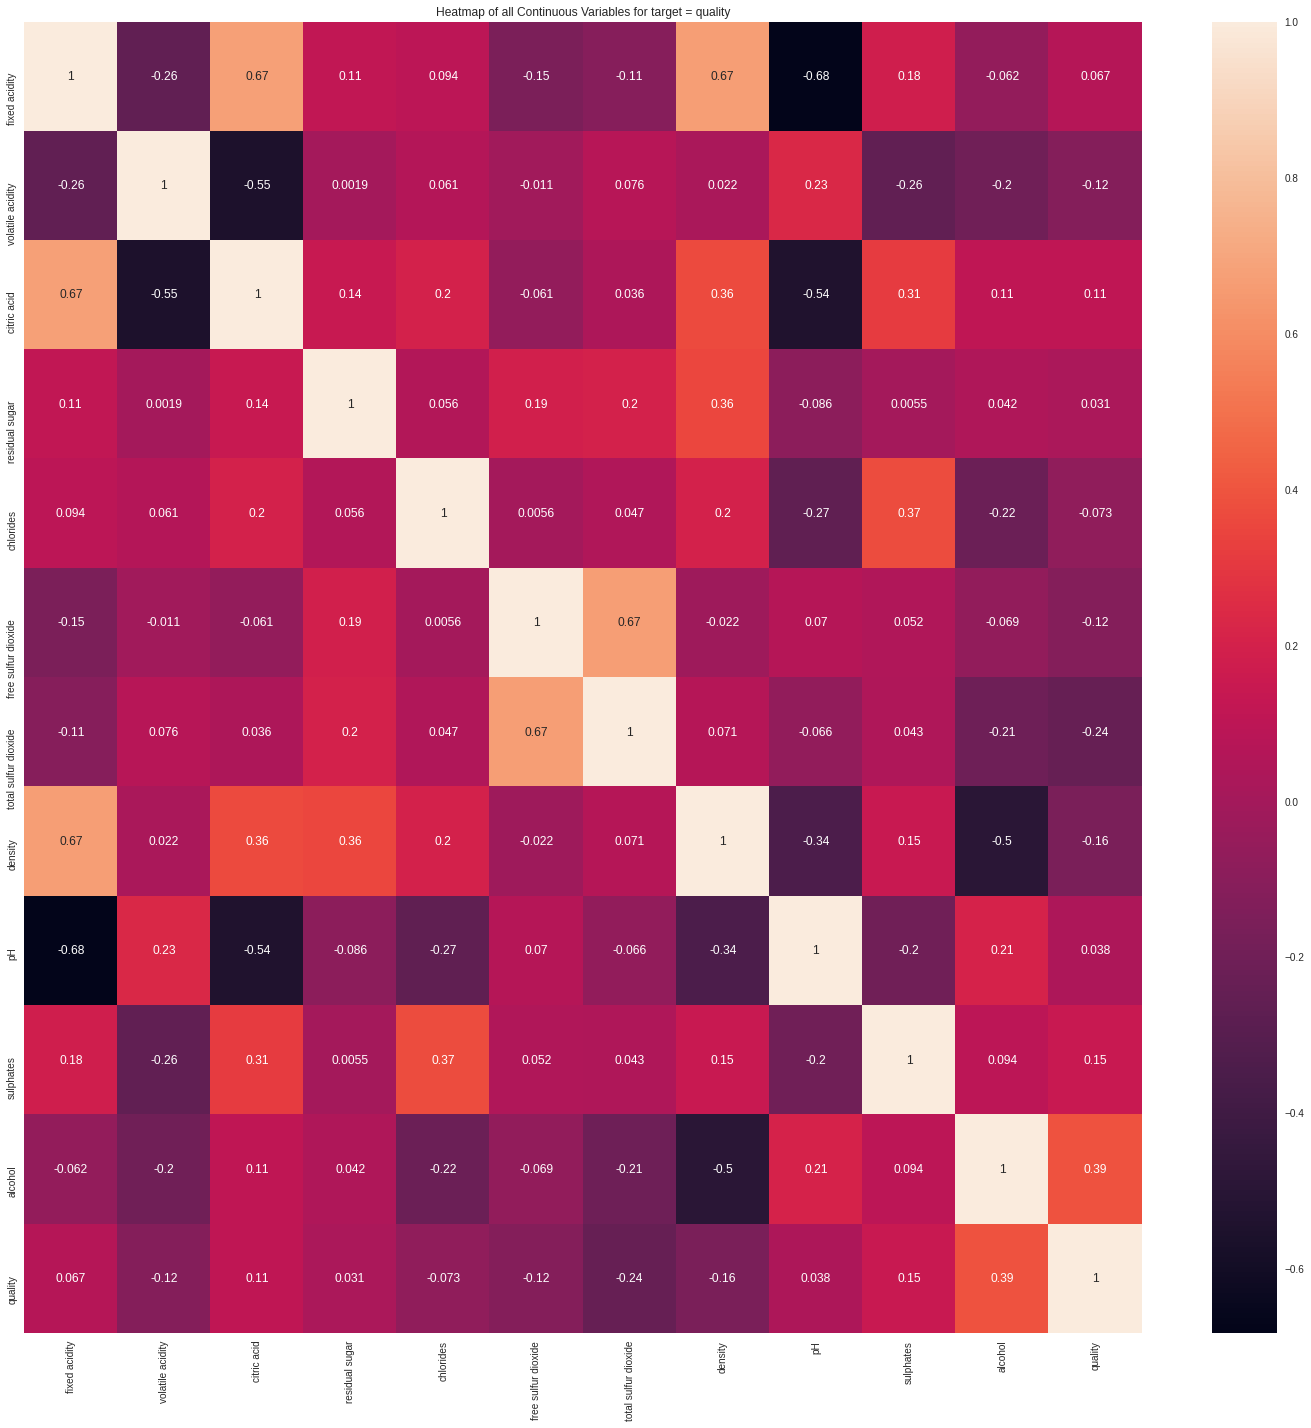

In [76]:
AV = AutoViz_Class()
AV.AutoViz('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';', depVar = 'quality')

Possíveis padrões nos dados:
- Os vinhos de qualidade mediana(6) apresentam consideravelmente mais cloridos que todas as outras categorias. Os de qualidade baixa, 3 ou 4, apresentam quantidades bem pequena de clorido.
- Os niveis de acido cítrico variam bastante mas os vinhos de qualidade alta(7 ou 8) possuem valores de ácido citrico por volta de 0.5, já os de qualidade ruim possuem proximo de 0 ácido nítrico.
- Os vinhos de qualidade alta(7 ou 8) possuem uma densidade um pouco menor que a dos vinhos de pior qualidade
- Os vinhos de qualidade baixa e mediana possuem niveis de alcool predominantemente dentro do intervalo 0-10 enquanto os de qualidade alta possuem niveis de alcool consideravelmente maiores que 10.
- Os vinhos de boa qualidade possuem acidez volátil consideravelmente menor que os de qualidade ruim.
- Os vinhos de boa qualidade tendem a ter o pH um pouco menor que os de má qualidade.

As variáveis que apresentam maior potencial para futuros modelos de predição são: Alcool, total de dioxidos de enxofre, sulfatos e densidade.



#Distribuição da qualidade
Como é possível ver no histograma a distribuição é mais ou menos normal com mediana entre 5 e 6.

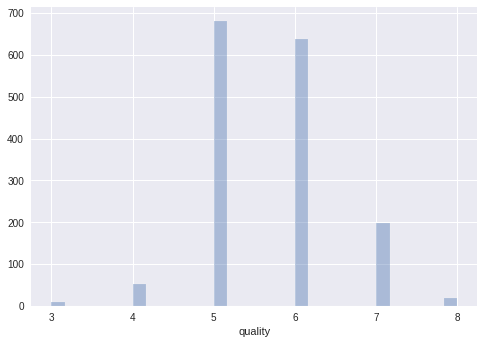

In [82]:
sns.distplot(df['quality'], kde = False)
plt.show()

# Mais alguns testes

Z-teste para avaliar a diferença estatística entre os vinhos de notável qualidade(7 ou 8) do restante.
O valor de 7 ou mais foi escolhido arbitrariamente e pode ser alterado de acordo com o objetivo do estudo.

In [92]:
df_78 = df[df['quality'] > 6]
df_others = df[df['quality'] <= 6]


t_stat, p_value = ztest(df_78.density, df_others.density)
print('Densidade\n')
print('p-value: ', p_value)
print('\nt-stat: ', t_stat)
t_stat, p_value = ztest(df_78.alcohol, df_others.alcohol)
print('\nAlcool\n')
print('p-value: ', p_value)
print('\nt-stat: ', t_stat)
t_stat, p_value = ztest(df_78['total sulfur dioxide'], df_others['total sulfur dioxide'])
print('\nTotal de dioxido de enxofre\n')
print('p-value: ', p_value)
print('\nt-stat: ', t_stat)
t_stat, p_value = ztest(df_78['sulphates'], df_others['sulphates'])
print('\nSulfatos\n')
print('p-value: ', p_value)
print('\nt-stat: ', t_stat)

Densidade

p-value:  1.1870833428472882e-09

t-stat:  -6.081978709824803

Alcool

p-value:  4.705343335532456e-71

t-stat:  17.822763607394528

Total de dioxido de enxofre

p-value:  1.7969253912884334e-08

t-stat:  -5.630495586992331

Sulfatos

p-value:  4.104460358184874e-16

t-stat:  8.13543965838325


Segundo os testes há uma diferença estatística entre as médias de todas as variaveis analisadas com base na análise anterior. Não é possivel descartar nenhuma dessas hipoteses.

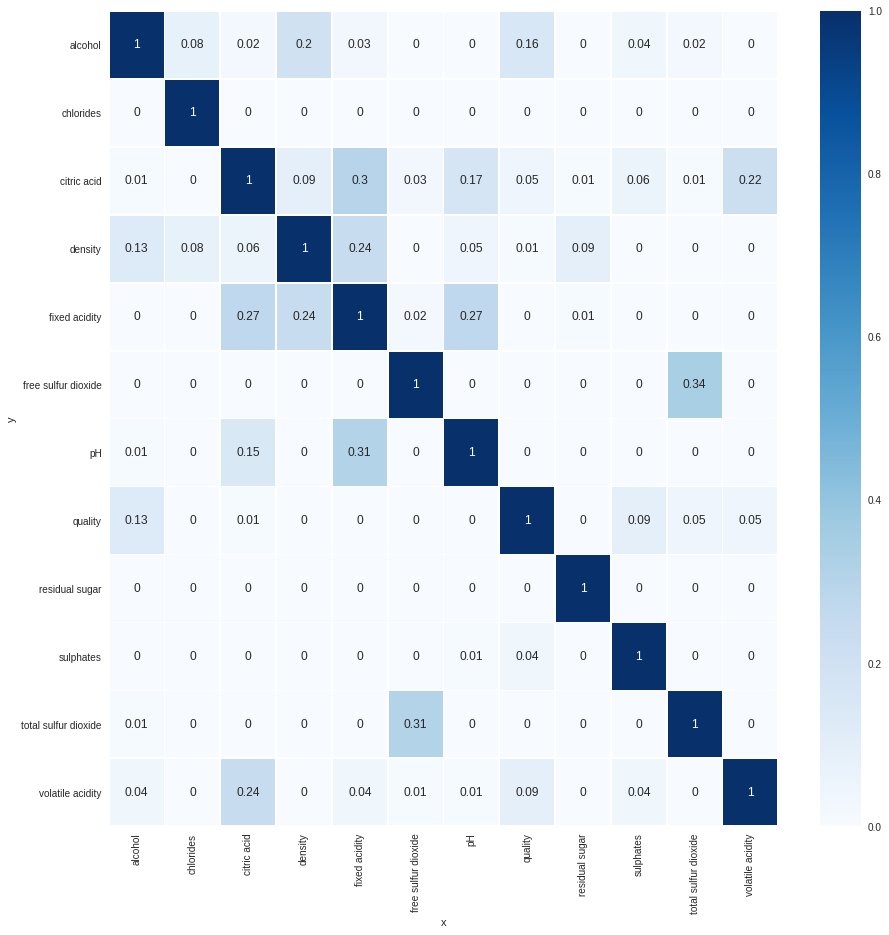

In [93]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0,XX
plt.subplots(figsize = (15,15))

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True)

A análise do PPS(predictive power score) acima permite ter uma ideia do poder preditivo de certas variáveis mesmo quando a relação não é linear, ao contrario da matriz de correlações que necessita de relação linear). É possível observar que as variaveis de volatilidade ácida, sulfatos e alcool possuem notável poder preditivo. 

## Conclusões finais
Os dados coletados mostraram potencial para previsão da qualidade dos vinhos através da análise de sua composição. As variáveis que demostraram maior potencial são: alcool, total de dioxidos de enxofre, sulfatos e densidade, volatilidade acida e acido citrico.
Esses dados podem ser usados para prever a nota de um vinho ou ainda tentar melhorar a nota de novas safras de alguns desses vinhos através de processos que visem auprir as fraquezas que forem detectadas.

Bonus:
Implementaçao rápida de um algoritmo de Random Forest para prever se um vinho tem boa qualidade(nota acima de 6)

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter = ';')
df2['is_high_quality'] = df2.quality.apply(lambda x: 1 if x >6 else 0)
df2.drop(columns = ['quality'], inplace = True)


target = df2.is_high_quality
features = df2.drop(columns = ['is_high_quality'])
scaler = StandardScaler()
features = scaler.fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9125

Implementação do mesmo algoritmo usando apenas as variáveis que demostraram grande potencial.

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', usecols = ['quality', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'citric acid' ] , delimiter = ';')
df2['is_high_quality'] = df2.quality.apply(lambda x: 1 if x >6 else 0)
df2.drop(columns = ['quality'], inplace = True)


target = df2.is_high_quality
features = df2.drop(columns = ['is_high_quality'])
scaler = StandardScaler()
features = scaler.fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9125

A precisão identica mostra que provavelmente as variáveis detectadas na análise exploratória são de fato as mais importantes. Contudo é possível que haja combinações de variaveis que possuam informações uteis em análises posteriores.